<a href="https://colab.research.google.com/github/Alerakha/05_Aleron-Tsaqif-Rakha_PCVK_Ganjil_2024/blob/main/Pertemuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


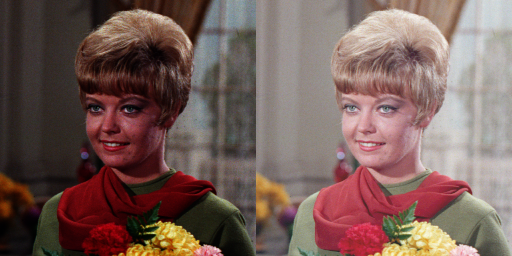

In [1]:
# @title 1. GAMMA CORRECTION

from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

gamma_correction = np.array(255*((img/255) ** (1/gamma)), dtype = 'uint8')

final_frame = cv.hconcat([img,gamma_correction])
cv2_imshow(final_frame)

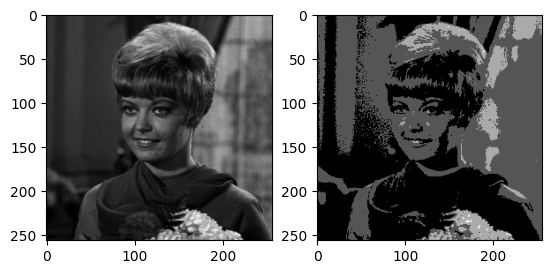

In [2]:
# @title 2. Simulasi Image Depth
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


bit_depth=2 #kedalaman yg diinginkan 1=2, 2=4, 4=16, 5=32, dst
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive//PCVK/Images/female.tiff',cv.IMREAD_GRAYSCALE)
# depth_image = np.zeros(original.shape, original.dtype)
depth_image = np.round(original/level)*level

plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(depth_image, cmap='gray')


plt.show()

PSNR value for 5 images: 27.524179898529496 dB


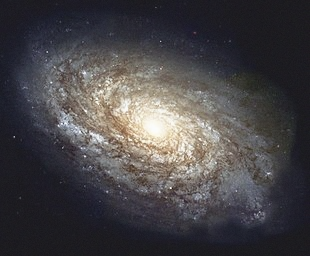

PSNR value for 10 images: 27.555538702725954 dB


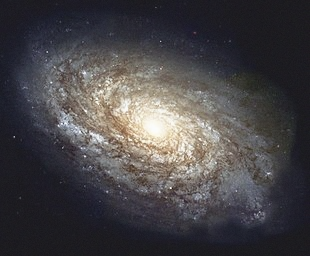

PSNR value for 20 images: 27.515866660998654 dB


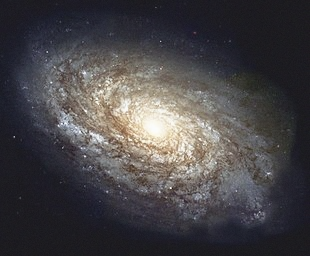

PSNR value for 40 images: 27.451074471925025 dB


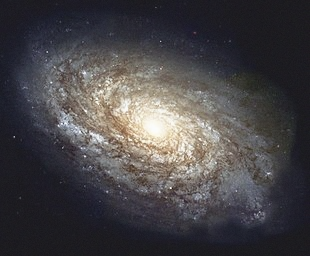

PSNR value for 80 images: 27.396202550461993 dB


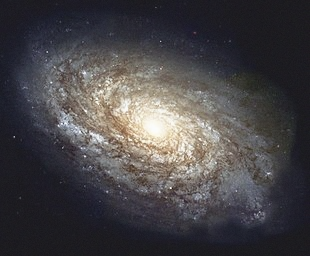

PSNR value for 100 images: 27.370931279516654 dB


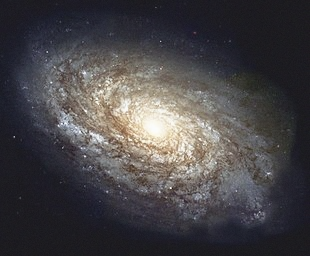

In [11]:
# @title 3. Average Denoising
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import glob

def calculate_psnr(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
img_path = glob.glob('/content/drive/MyDrive//PCVK/Images/noises/*.jpg')
image_count = [5, 10, 20, 40, 80, 100]
psnr_values = [] #untuk menyimpan nilai psnr

for num_images in image_count:
  cv_img = []
  for i in range(num_images):
    if i < len(img_path):
      img = cv.imread(img_path[i])
      cv_img.append(img)
    else:
      break

  average_image = np.mean(cv_img, axis=0)
  average_image = average_image.astype(np.uint8)
  psnr = calculate_psnr(original_image, average_image)
  psnr_values.append(psnr)

for i, num_images in enumerate(image_count):
  print(f"PSNR value for {num_images} images: {psnr_values[i]} dB")
  cv2_imshow(average_image)

